In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import numba as num

In [77]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsTransformer,KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [6]:
xtrain = np.load('./train_dataset/x_train.npy')
ytrain = np.load('./train_dataset/y_train.npy')

In [7]:
xtest = np.load('./test_dataset/x_test.npy')
ytest = np.load('./test_dataset/y_test.npy')

In [11]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2000, 128, 128, 1), (2000, 2), (120, 128, 128, 1), (120, 2))

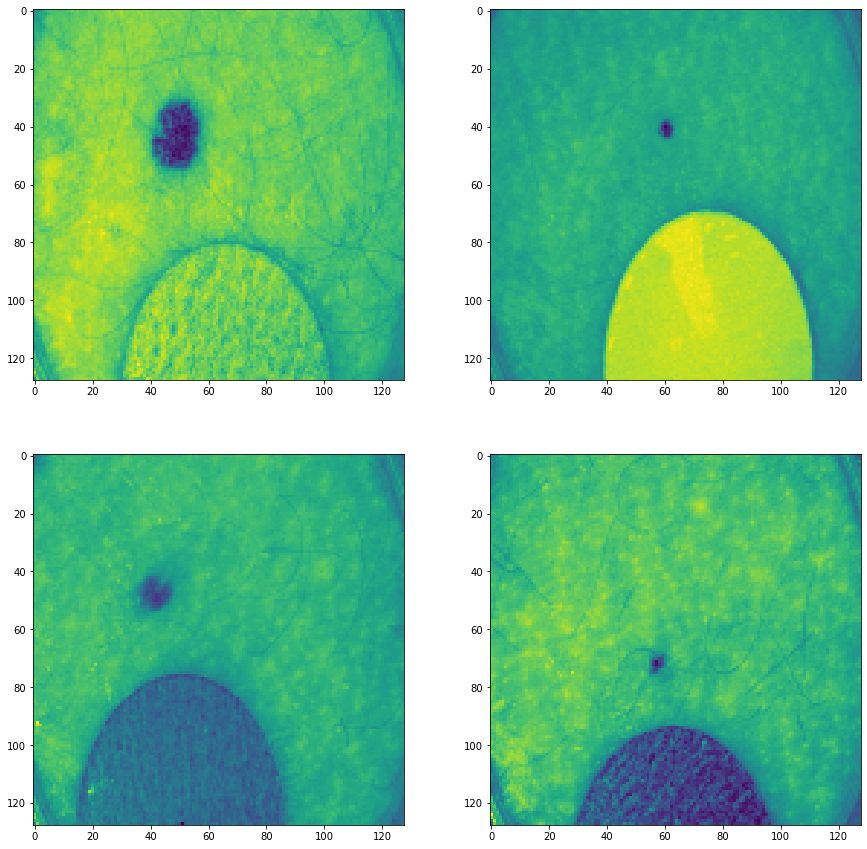

In [16]:
fig, axarr = plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(xtrain[0], interpolation='nearest')
axarr[0,1].imshow(xtrain[1], interpolation='nearest')
axarr[1,0].imshow(xtrain[2], interpolation='nearest')
axarr[1,1].imshow(xtrain[3], interpolation='nearest')

In [20]:
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

In [21]:
ytest

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1,

## PCA

In [47]:
pca = PCA(n_components=2)

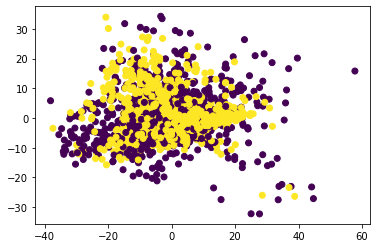

In [48]:
pca = pca.fit_transform(xtrain.reshape(2000,128*128))
plt.scatter(pca[:,0],pca[:,1], c = ytrain[:,0])
plt.show()

In [62]:
xtrain = np.load('./train_dataset/x_train.npy')
ytrain = np.load('./train_dataset/y_train.npy')

In [63]:
xtest = np.load('./test_dataset/x_test.npy')
ytest = np.load('./test_dataset/y_test.npy')

In [64]:
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

In [65]:
pca = PCA(n_components=120)

In [66]:
xtrain = pca.fit_transform(xtrain.reshape(2000,128*128))
xtest = pca.fit_transform(xtest.reshape(120,128*128))
xtrain.shape,xtest.shape

((2000, 120), (120, 120))

## KNN

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,f1_score,recall_score

In [102]:
clf = KNeighborsClassifier(n_neighbors=15).fit(xtrain,ytrain)
clf

KNeighborsClassifier(n_neighbors=15)

In [103]:
clf_score =clf.score(xtest, ytest)
print("Accuracy: ", clf_score)
y_pred = clf.predict(xtest)
classification_rep = classification_report(ytest,y_pred)
print("Classification\n",classification_rep)


Accuracy:  0.6166666666666667
Classification
               precision    recall  f1-score   support

           0       0.59      0.75      0.66        60
           1       0.66      0.48      0.56        60

   micro avg       0.62      0.62      0.62       120
   macro avg       0.63      0.62      0.61       120
weighted avg       0.63      0.62      0.61       120
 samples avg       0.62      0.62      0.62       120

